In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# NBER recessions
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1947, 1, 1), end=datetime(2013, 4, 1))

In [13]:
import pymc3 as pm

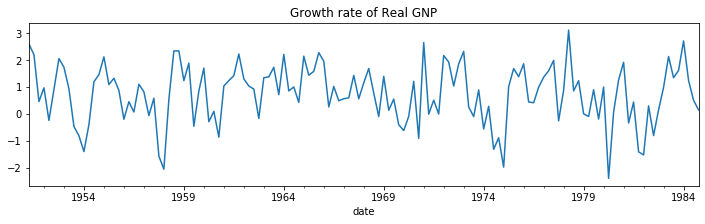

In [3]:
# Get the RGNP data to replicate Hamilton
dta = pd.read_stata('https://www.stata-press.com/data/r14/rgnp.dta').iloc[1:]
dta.index = pd.DatetimeIndex(dta.date, freq='QS')
dta_hamilton = dta.rgnp

# Plot the data
dta_hamilton.plot(title='Growth rate of Real GNP', figsize=(12,3))

# Fit the model
mod_hamilton = sm.tsa.MarkovAutoregression(dta_hamilton, k_regimes=2, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()

In [4]:
timeseries = dta_hamilton.values

In [5]:
Y = timeseries[4:]

In [6]:
Y = timeseries[4:]
X = np.concatenate([[timeseries[3:-1]], [timeseries[2:-2]], [timeseries[1:-3]], [timeseries[0:-4]]], axis=0).T

In [7]:
k_regimes = 2
T, lag = X.shape

In [8]:
prob = []

for k0 in range(k_regimes):
    for k1 in range(k_regimes):
        for k2 in range(k_regimes):
            for k3 in range(k_regimes):
                for k4 in range(k_regimes):
                    prob.append(0)

In [9]:
T

131

In [10]:
X.shape

(131, 4)

In [14]:
with pm.Model() as model:    
    ps = [pm.Uniform('p%d'%i, upper=1, lower= 0)  for i in range(k_regimes)]
    consts = [pm.Uniform('const%d'%i, upper=-100, lower= 100) for i in range(k_regimes)]
    phis = [pm.Uniform('phi %d'%i, upper=-100, lower= 100) for i in range(lag)]
    sigma = pm.Uniform('sigma', upper=100, lower= 0)
    
    past_probs = []
    for k0 in range(k_regimes):
        prob = ps[k0]
        for k1 in range(k_regimes):
            if k0 == k1:
                prob = prob*ps[k1]
            else:
                prob = prob*(1-ps[k1])
            for k2 in range(k_regimes):
                if k1 == k2:
                    prob = prob*ps[k2]
                else:
                    prob = prob*(1-ps[k2])
                for k3 in range(k_regimes):
                    if k2 == k3:
                        prob = prob*ps[k3]
                    else:
                        prob = prob*(1-ps[k3])
                    for k4 in range(k_regimes):
                        if k3 == k4:
                            prob = prob*ps[k4]
                        else:
                            prob = prob*(1-ps[k4])
                        past_probs.append(prob)
            
    def likelifood_func(X, Y):
        
        for t in range(3):
        
            temp_list = []
            for k0 in range(k_regimes):

                for k1 in range(k_regimes):
                    for k2 in range(k_regimes):
                        for k3 in range(k_regimes):
                            for k4 in range(k_regimes):

                                y = consts[k0]  + phis[k1]*(X[t, 0] - consts[k1]) + phis[k2]*(X[t, 1] - consts[k2]) + phis[k3]*(X[t, 2] - consts[k3]) + phis[k4]*(X[t, 3] - consts[k4])

                                #print(consts[k0])
                                #f_y_k_p = pm.Normal('f%d%d%d%d%d%d'%(k0, k1, k2, k3, k4, time), mu=Y-y_k, sd=sigmas[k0])
                                y =pm.math.exp(-((Y[t]-y)**2)/2*sigma)

                                temp_list.append(y)

            for k in range(len(temp_list)):                    
                if k == 0:
                    denom = temp_list[k]
                    likelihood_temp = temp_list[k]*past_probs[k]
                else:
                    denom = temp_list[k]
                    likelihood_temp +=  temp_list[k]*past_probs[k]

            for k in range(len(temp_list)):
                past_probs[k] = temp_list[k]/denom

            if t == 0:
                likelihood = pm.math.log(likelihood_temp)
            else:
                likelihood += pm.math.log(likelihood_temp)
            #print(likelihood_temp)
                    
        print('likelihood', likelihood)
        return likelihood
    
    like = pm.DensityDist('likelihood', likelifood_func, observed={'X':X, 'Y':Y})
    
    start = pm.find_MAP(model = model)
    step = pm.Metropolis()
    trace = pm.sample(10000, step = step)
    
pm.traceplot(trace)

likelihood Elemwise{add,no_inplace}.0
likelihood Elemwise{add,no_inplace}.0
likelihood Elemwise{add,no_inplace}.0


/Users/mkato/opt/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')



You can find the C code in this temporary file: /var/folders/t3/mkg154dd30b8cbs875f8w69w0000gn/T/theano_compilation_error_57r6u36u


Exception: ('The following error happened while compiling the node', Elemwise{Composite{(i0 * ((i1 * i2 * i3 * i4) + ((i1 * i5 * i6 * i7 * i4) / i8) + (i1 * (((i9 * i5 * i6 * i10) / i8) + ((i9 * i11 * i12 * i10) / i8) + ((i9 * i13 * i14 * i10) / i8) + ((i9 * i15 * i16 * i10) / i8) + ((i9 * i17 * i18 * i10) / i8) + ((i9 * i19 * i20 * i10) / i8) + ((i9 * i21 * i22 * i10) / i8) + ((i9 * i23 * i24 * i10) / i8) + ((i9 * i25 * i26 * i10) / i8) + ((i9 * i27 * i28 * i10) / i8) + ((i9 * i29 * i30 * i10) / i8) + ((i9 * i31 * i32 * i10) / i8) + ((i9 * i33 * i34 * i10) / i8) + ((i9 * i35 * i36 * i10) / i8) + ((i9 * i37 * i38 * i10) / i8) + ((i9 * i39 * i40 * i10) / i8) + ((i9 * i41 * i42 * i10) / i8) + ((i9 * i43 * i44 * i10) / i8) + ((i9 * i45 * i46 * i10) / i8) + ((i9 * i47 * i48 * i10) / i8) + ((i9 * i49 * i50 * i10) / i8) + ((i9 * i51 * i52 * i10) / i8) + ((i9 * i53 * i54 * i10) / i8) + ((i9 * i55 * i56 * i10) / i8) + ((i9 * i57 * i58 * i10) / i8) + ((i9 * i59 * i60 * i10) / i8) + ((i9 * i61 * i62 * i10) / i8) + ((i9 * i63 * i64 * i10) / i8) + ((i9 * i65 * i66 * i10) / i8) + ((i9 * i67 * i68 * i10) / i8) + ((i9 * i69 * i70 * i10) / i8) + ((i71 * i10) / i72) + ((i9 * i71 * i10) / i72)) * i4) + (i1 * i73 * i74 * i4) + ((i1 * i11 * i12 * i75 * i4) / i8) + (i1 * i76 * i77 * i4) + ((i1 * i13 * i14 * i78 * i4) / i8) + (i1 * i79 * i80 * i4) + ((i1 * i15 * i16 * i81 * i4) / i8) + (i1 * i82 * i83 * i4) + ((i1 * i17 * i18 * i84 * i4) / i8) + (i1 * i85 * i86 * i4) + ((i1 * i19 * i20 * i87 * i4) / i8) + (i1 * i88 * i89 * i4) + ((i1 * i21 * i22 * i90 * i4) / i8) + (i1 * i91 * i92 * i4) + ((i1 * i23 * i24 * i93 * i4) / i8) + (i1 * i94 * i95 * i4) + ((i1 * i25 * i26 * i96 * i4) / i8) + (i1 * i97 * i98 * i4) + ((i1 * i27 * i28 * i99 * i4) / i8) + (i1 * i100 * i101 * i4) + ((i1 * i29 * i30 * i102 * i4) / i8) + (i1 * i103 * i104 * i4) + ((i1 * i31 * i32 * i105 * i4) / i8) + (i1 * i106 * i107 * i4) + ((i1 * i33 * i34 * i108 * i4) / i8) + (i1 * i109 * i110 * i4) + ((i1 * i35 * i36 * i111 * i4) / i8) + (i1 * i112 * i113 * i4) + ((i1 * i37 * i38 * i114 * i4) / i8) + (i1 * i115 * i116 * i4) + ((i1 * i39 * i40 * i117 * i4) / i8) + (i1 * i118 * i119 * i4) + ((i1 * i41 * i42 * i120 * i4) / i8) + (i1 * i121 * i122 * i4) + ((i1 * i43 * i44 * i123 * i4) / i8) + (i1 * i124 * i125 * i4) + ((i1 * i45 * i46 * i126 * i4) / i8) + (i1 * i127 * i128 * i4) + ((i1 * i47 * i48 * i129 * i4) / i8) + (i1 * i130 * i131 * i4) + ((i1 * i49 * i50 * i132 * i4) / i8) + (i1 * i133 * i134 * i4) + ((i1 * i51 * i52 * i135 * i4) / i8) + (i1 * i136 * i137 * i4) + ((i1 * i53 * i54 * i138 * i4) / i8) + (i1 * i139 * i140 * i4) + ((i1 * i55 * i56 * i141 * i4) / i8) + (i1 * i142 * i143 * i4) + ((i1 * i57 * i58 * i144 * i4) / i8) + (i1 * i145 * i146 * i4) + ((i1 * i59 * i60 * i147 * i4) / i8) + (i1 * i148 * i149 * i4) + ((i1 * i61 * i62 * i150 * i4) / i8) + (i1 * i151 * i152 * i4) + ((i1 * i63 * i64 * i153 * i4) / i8) + (i1 * i154 * i155 * i4) + ((i1 * i65 * i66 * i156 * i4) / i8) + (i1 * i157 * i158 * i4) + ((i1 * i67 * i68 * i159 * i4) / i8) + (i1 * i160 * i161 * i4) + ((i1 * i69 * i70 * i162 * i4) / i8) + (i1 * (((i71 * i163) / i72) + ((i9 * i164 * i5 * i163) / i165) + ((i9 * i166 * i11 * i163) / i165) + ((i9 * i167 * i13 * i163) / i165) + ((i9 * i168 * i15 * i163) / i165) + ((i9 * i169 * i17 * i163) / i165) + ((i9 * i170 * i19 * i163) / i165) + ((i9 * i171 * i21 * i163) / i165) + ((i9 * i172 * i23 * i163) / i165) + ((i9 * i173 * i25 * i163) / i165) + ((i9 * i174 * i27 * i163) / i165) + ((i9 * i175 * i29 * i163) / i165) + ((i9 * i176 * i31 * i163) / i165) + ((i9 * i177 * i33 * i163) / i165) + ((i9 * i178 * i35 * i163) / i165) + ((i9 * i179 * i37 * i163) / i165) + ((i9 * i180 * i39 * i163) / i165) + ((i9 * i181 * i41 * i163) / i165) + ((i9 * i182 * i43 * i163) / i165) + ((i9 * i183 * i45 * i163) / i165) + ((i9 * i184 * i47 * i163) / i165) + ((i9 * i185 * i49 * i163) / i165) + ((i9 * i186 * i51 * i163) / i165) + ((i9 * i187 * i53 * i163) / i165) + ((i9 * i188 * i55 * i163) / i165) + ((i9 * i189 * i57 * i163) / i165) + ((i9 * i190 * i59 * i163) / i165) + ((i9 * i191 * i61 * i163) / i165) + ((i9 * i192 * i63 * i163) / i165) + ((i9 * i193 * i65 * i163) / i165) + ((i9 * i194 * i67 * i163) / i165) + ((i9 * i195 * i69 * i163) / i165) + ((i196 * i163) / i197) + ((i9 * i196 * i163) / i197)) * i4) + (i1 * i198 * i199 * i4) + (i1 * i200 * i201 * i4) + (i1 * i202 * i203 * i4) + (i1 * i204 * i205 * i4) + (i1 * i206 * i207 * i4) + (i1 * i208 * i209 * i4) + (i1 * i210 * i211 * i4) + (i1 * i212 * i213 * i4) + (i1 * i214 * i215 * i4) + (i1 * i216 * i217 * i4) + (i1 * i218 * i219 * i4) + (i1 * i220 * i221 * i4) + (i1 * i222 * i223 * i4) + (i1 * i224 * i225 * i4) + (i1 * i226 * i227 * i4) + (i1 * i228 * i229 * i4) + (i1 * i230 * i231 * i4) + (i1 * i232 * i233 * i4) + (i1 * i234 * i235 * i4) + (i1 * i236 * i237 * i4) + (i1 * i238 * i239 * i4) + (i1 * i240 * i241 * i4) + (i1 * i242 * i243 * i4) + (i1 * i244 * i245 * i4) + (i1 * i246 * i247 * i4) + (i1 * i248 * i249 * i4) + (i1 * i250 * i251 * i4) + (i1 * i252 * i253 * i4) + (i1 * i254 * i255 * i4) + (i1 * i256 * i257 * i4) + (i1 * i258 * i259 * i4) + (i1 * (((i196 * i260) / i197) + ((i9 * i6 * i164 * i260) / i261) + ((i9 * i12 * i166 * i260) / i261) + ((i9 * i14 * i167 * i260) / i261) + ((i9 * i16 * i168 * i260) / i261) + ((i9 * i18 * i169 * i260) / i261) + ((i9 * i20 * i170 * i260) / i261) + ((i9 * i22 * i171 * i260) / i261) + ((i9 * i24 * i172 * i260) / i261) + ((i9 * i26 * i173 * i260) / i261) + ((i9 * i28 * i174 * i260) / i261) + ((i9 * i30 * i175 * i260) / i261) + ((i9 * i32 * i176 * i260) / i261) + ((i9 * i34 * i177 * i260) / i261) + ((i9 * i36 * i178 * i260) / i261) + ((i9 * i38 * i179 * i260) / i261) + ((i9 * i40 * i180 * i260) / i261) + ((i9 * i42 * i181 * i260) / i261) + ((i9 * i44 * i182 * i260) / i261) + ((i9 * i46 * i183 * i260) / i261) + ((i9 * i48 * i184 * i260) / i261) + ((i9 * i50 * i185 * i260) / i261) + ((i9 * i52 * i186 * i260) / i261) + ((i9 * i54 * i187 * i260) / i261) + ((i9 * i56 * i188 * i260) / i261) + ((i9 * i58 * i189 * i260) / i261) + ((i9 * i60 * i190 * i260) / i261) + ((i9 * i62 * i191 * i260) / i261) + ((i9 * i64 * i192 * i260) / i261) + ((i9 * i66 * i193 * i260) / i261) + ((i9 * i68 * i194 * i260) / i261) + ((i9 * i70 * i195 * i260) / i261) + ((i262 * i260) / i263) + ((i9 * i262 * i260) / i263)) * i4) + ((i1 * i164 * i6 * i7 * i4) / i261) + ((i1 * i166 * i12 * i75 * i4) / i261) + ((i1 * i167 * i14 * i78 * i4) / i261) + ((i1 * i168 * i16 * i81 * i4) / i261) + ((i1 * i169 * i18 * i84 * i4) / i261) + ((i1 * i170 * i20 * i87 * i4) / i261) + ((i1 * i171 * i22 * i90 * i4) / i261) + ((i1 * i172 * i24 * i93 * i4) / i261) + ((i1 * i173 * i26 * i96 * i4) / i261) + ((i1 * i174 * i28 * i99 * i4) / i261) + ((i1 * i175 * i30 * i102 * i4) / i261) + ((i1 * i176 * i32 * i105 * i4) / i261) + ((i1 * i177 * i34 * i108 * i4) / i261) + ((i1 * i178 * i36 * i111 * i4) / i261) + ((i1 * i179 * i38 * i114 * i4) / i261) + ((i1 * i180 * i40 * i117 * i4) / i261) + ((i1 * i181 * i42 * i120 * i4) / i261) + ((i1 * i182 * i44 * i123 * i4) / i261) + ((i1 * i183 * i46 * i126 * i4) / i261) + ((i1 * i184 * i48 * i129 * i4) / i261) + ((i1 * i185 * i50 * i132 * i4) / i261) + ((i1 * i186 * i52 * i135 * i4) / i261) + ((i1 * i187 * i54 * i138 * i4) / i261) + ((i1 * i188 * i56 * i141 * i4) / i261) + ((i1 * i189 * i58 * i144 * i4) / i261) + ((i1 * i190 * i60 * i147 * i4) / i261) + ((i1 * i191 * i62 * i150 * i4) / i261) + ((i1 * i192 * i64 * i153 * i4) / i261) + ((i1 * i193 * i66 * i156 * i4) / i261) + ((i1 * i194 * i68 * i159 * i4) / i261) + ((i1 * i195 * i70 * i162 * i4) / i261) + ((i1 * i262 * i10 * i4) / i263)) * (i264 - i4))}}[(0, 3)](TensorConstant{100.0}, TensorConstant{-0.5}, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, sigmoid.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{((i0 * i1) + (i2 * i3) + (i4 * i5) + (i6 * i7) + (i8 * i9) + (i10 * i11) + (i12 * i13) + (i14 * i15) + (i16 * i17) + (i18 * i19) + (i20 * i21) + (i22 * i23) + (i24 * i25) + (i26 * i27) + (i28 * i29) + (i30 * i31) + (i32 * i33) + (i34 * i35) + (i36 * i37) + (i38 * i39) + (i40 * i41) + (i42 * i43) + (i44 * i45) + (i46 * i47) + (i48 * i49) + (i50 * i51) + (i52 * i53) + (i54 * i55) + (i56 * i57) + (i58 * i59) + (i60 * i61) + (i62 * i63))}}.0, TensorConstant{-1.0}, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{((i0 * (i1 / i2)) + (i3 * (i4 / i2)) + (i5 * (i6 / i2)) + (i7 * (i8 / i2)) + (i9 * (i10 / i2)) + (i11 * (i12 / i2)) + (i13 * (i14 / i2)) + (i15 * (i16 / i2)) + (i17 * (i18 / i2)) + (i19 * (i20 / i2)) + (i21 * (i22 / i2)) + (i23 * (i24 / i2)) + (i25 * (i26 / i2)) + (i27 * (i28 / i2)) + (i29 * (i30 / i2)) + (i31 * (i32 / i2)) + (i33 * (i34 / i2)) + (i35 * (i36 / i2)) + (i37 * (i38 / i2)) + (i39 * (i40 / i2)) + (i41 * (i42 / i2)) + (i43 * (i44 / i2)) + (i45 * (i46 / i2)) + (i47 * (i48 / i2)) + (i49 * (i50 / i2)) + (i51 * (i52 / i2)) + (i53 * (i54 / i2)) + (i55 * (i56 / i2)) + (i57 * (i58 / i2)) + (i59 * (i60 / i2)) + (i61 * (i62 / i2)) + i63)}}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{(i0 + i1 + i2 + i3 + i4 + i5 + i6 + i7 + i8 + i9 + i10 + i11 + i12 + i13 + i14 + i15 + i16 + i17 + i18 + i19 + i20 + i21 + i22 + i23 + i24 + i25 + i26 + i27 + i28 + i29 + i30 + (i31 * i32))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{((i0 * (i1 / i2)) + (i3 * (i4 / i2)) + (i5 * (i6 / i2)) + (i7 * (i8 / i2)) + (i9 * (i10 / i2)) + (i11 * (i12 / i2)) + (i13 * (i14 / i2)) + (i15 * (i16 / i2)) + (i17 * (i18 / i2)) + (i19 * (i20 / i2)) + (i21 * (i22 / i2)) + (i23 * (i24 / i2)) + (i25 * (i26 / i2)) + (i27 * (i28 / i2)) + (i29 * (i30 / i2)) + (i31 * (i32 / i2)) + (i33 * (i34 / i2)) + (i35 * (i36 / i2)) + (i37 * (i38 / i2)) + (i39 * (i40 / i2)) + (i41 * (i42 / i2)) + (i43 * (i44 / i2)) + (i45 * (i46 / i2)) + (i47 * (i48 / i2)) + (i49 * (i50 / i2)) + (i51 * (i52 / i2)) + (i53 * (i54 / i2)) + (i55 * (i56 / i2)) + (i57 * (i58 / i2)) + (i59 * (i60 / i2)) + (i61 * (i62 / i2)) + i63)}}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(((i0 * i1) / i2) + (i3 / i4))}}[(0, 3)].0, Elemwise{sqr,no_inplace}.0, Elemwise{sqr,no_inplace}.0, Elemwise{Composite{(i0 + i1 + i2 + i3 + i4 + i5 + i6 + i7 + i8 + i9 + i10 + i11 + i12 + i13 + i14 + i15 + i16 + i17 + i18 + i19 + i20 + i21 + i22 + i23 + i24 + i25 + i26 + i27 + i28 + i29 + i30 + (i31 * i32))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{((i0 * (i1 / i2)) + (i3 * (i4 / i2)) + (i5 * (i6 / i2)) + (i7 * (i8 / i2)) + (i9 * (i10 / i2)) + (i11 * (i12 / i2)) + (i13 * (i14 / i2)) + (i15 * (i16 / i2)) + (i17 * (i18 / i2)) + (i19 * (i20 / i2)) + (i21 * (i22 / i2)) + (i23 * (i24 / i2)) + (i25 * (i26 / i2)) + (i27 * (i28 / i2)) + (i29 * (i30 / i2)) + (i31 * (i32 / i2)) + (i33 * (i34 / i2)) + (i35 * (i36 / i2)) + (i37 * (i38 / i2)) + (i39 * (i40 / i2)) + (i41 * (i42 / i2)) + (i43 * (i44 / i2)) + (i45 * (i46 / i2)) + (i47 * (i48 / i2)) + (i49 * (i50 / i2)) + (i51 * (i52 / i2)) + (i53 * (i54 / i2)) + (i55 * (i56 / i2)) + (i57 * (i58 / i2)) + (i59 * (i60 / i2)) + (i61 * (i62 / i2)) + i63)}}.0, TensorConstant{1.0}), '\n', 'Compilation failed (return status=1): /Users/mkato/.theano/compiledir_Darwin-19.0.0-x86_64-i386-64bit-i386-3.7.5-64/tmp95g55g2f/mod.cpp:24884:32: fatal error: bracket nesting level exceeded maximum of 256.         if (!PyErr_Occurred()) {.                                ^. /Users/mkato/.theano/compiledir_Darwin-19.0.0-x86_64-i386-64bit-i386-3.7.5-64/tmp95g55g2f/mod.cpp:24884:32: note: use -fbracket-depth=N to increase maximum nesting level. 1 error generated.. ', '[Elemwise{Composite{(i0 * ((i1 * i2 * i3 * i4) + ((i1 * i5 * i6 * i7 * i4) / i8) + (i1 * (((i9 * i5 * i6 * i10) / i8) + ((i9 * i11 * i12 * i10) / i8) + ((i9 * i13 * i14 * i10) / i8) + ((i9 * i15 * i16 * i10) / i8) + ((i9 * i17 * i18 * i10) / i8) + ((i9 * i19 * i20 * i10) / i8) + ((i9 * i21 * i22 * i10) / i8) + ((i9 * i23 * i24 * i10) / i8) + ((i9 * i25 * i26 * i10) / i8) + ((i9 * i27 * i28 * i10) / i8) + ((i9 * i29 * i30 * i10) / i8) + ((i9 * i31 * i32 * i10) / i8) + ((i9 * i33 * i34 * i10) / i8) + ((i9 * i35 * i36 * i10) / i8) + ((i9 * i37 * i38 * i10) / i8) + ((i9 * i39 * i40 * i10) / i8) + ((i9 * i41 * i42 * i10) / i8) + ((i9 * i43 * i44 * i10) / i8) + ((i9 * i45 * i46 * i10) / i8) + ((i9 * i47 * i48 * i10) / i8) + ((i9 * i49 * i50 * i10) / i8) + ((i9 * i51 * i52 * i10) / i8) + ((i9 * i53 * i54 * i10) / i8) + ((i9 * i55 * i56 * i10) / i8) + ((i9 * i57 * i58 * i10) / i8) + ((i9 * i59 * i60 * i10) / i8) + ((i9 * i61 * i62 * i10) / i8) + ((i9 * i63 * i64 * i10) / i8) + ((i9 * i65 * i66 * i10) / i8) + ((i9 * i67 * i68 * i10) / i8) + ((i9 * i69 * i70 * i10) / i8) + ((i71 * i10) / i72) + ((i9 * i71 * i10) / i72)) * i4) + (i1 * i73 * i74 * i4) + ((i1 * i11 * i12 * i75 * i4) / i8) + (i1 * i76 * i77 * i4) + ((i1 * i13 * i14 * i78 * i4) / i8) + (i1 * i79 * i80 * i4) + ((i1 * i15 * i16 * i81 * i4) / i8) + (i1 * i82 * i83 * i4) + ((i1 * i17 * i18 * i84 * i4) / i8) + (i1 * i85 * i86 * i4) + ((i1 * i19 * i20 * i87 * i4) / i8) + (i1 * i88 * i89 * i4) + ((i1 * i21 * i22 * i90 * i4) / i8) + (i1 * i91 * i92 * i4) + ((i1 * i23 * i24 * i93 * i4) / i8) + (i1 * i94 * i95 * i4) + ((i1 * i25 * i26 * i96 * i4) / i8) + (i1 * i97 * i98 * i4) + ((i1 * i27 * i28 * i99 * i4) / i8) + (i1 * i100 * i101 * i4) + ((i1 * i29 * i30 * i102 * i4) / i8) + (i1 * i103 * i104 * i4) + ((i1 * i31 * i32 * i105 * i4) / i8) + (i1 * i106 * i107 * i4) + ((i1 * i33 * i34 * i108 * i4) / i8) + (i1 * i109 * i110 * i4) + ((i1 * i35 * i36 * i111 * i4) / i8) + (i1 * i112 * i113 * i4) + ((i1 * i37 * i38 * i114 * i4) / i8) + (i1 * i115 * i116 * i4) + ((i1 * i39 * i40 * i117 * i4) / i8) + (i1 * i118 * i119 * i4) + ((i1 * i41 * i42 * i120 * i4) / i8) + (i1 * i121 * i122 * i4) + ((i1 * i43 * i44 * i123 * i4) / i8) + (i1 * i124 * i125 * i4) + ((i1 * i45 * i46 * i126 * i4) / i8) + (i1 * i127 * i128 * i4) + ((i1 * i47 * i48 * i129 * i4) / i8) + (i1 * i130 * i131 * i4) + ((i1 * i49 * i50 * i132 * i4) / i8) + (i1 * i133 * i134 * i4) + ((i1 * i51 * i52 * i135 * i4) / i8) + (i1 * i136 * i137 * i4) + ((i1 * i53 * i54 * i138 * i4) / i8) + (i1 * i139 * i140 * i4) + ((i1 * i55 * i56 * i141 * i4) / i8) + (i1 * i142 * i143 * i4) + ((i1 * i57 * i58 * i144 * i4) / i8) + (i1 * i145 * i146 * i4) + ((i1 * i59 * i60 * i147 * i4) / i8) + (i1 * i148 * i149 * i4) + ((i1 * i61 * i62 * i150 * i4) / i8) + (i1 * i151 * i152 * i4) + ((i1 * i63 * i64 * i153 * i4) / i8) + (i1 * i154 * i155 * i4) + ((i1 * i65 * i66 * i156 * i4) / i8) + (i1 * i157 * i158 * i4) + ((i1 * i67 * i68 * i159 * i4) / i8) + (i1 * i160 * i161 * i4) + ((i1 * i69 * i70 * i162 * i4) / i8) + (i1 * (((i71 * i163) / i72) + ((i9 * i164 * i5 * i163) / i165) + ((i9 * i166 * i11 * i163) / i165) + ((i9 * i167 * i13 * i163) / i165) + ((i9 * i168 * i15 * i163) / i165) + ((i9 * i169 * i17 * i163) / i165) + ((i9 * i170 * i19 * i163) / i165) + ((i9 * i171 * i21 * i163) / i165) + ((i9 * i172 * i23 * i163) / i165) + ((i9 * i173 * i25 * i163) / i165) + ((i9 * i174 * i27 * i163) / i165) + ((i9 * i175 * i29 * i163) / i165) + ((i9 * i176 * i31 * i163) / i165) + ((i9 * i177 * i33 * i163) / i165) + ((i9 * i178 * i35 * i163) / i165) + ((i9 * i179 * i37 * i163) / i165) + ((i9 * i180 * i39 * i163) / i165) + ((i9 * i181 * i41 * i163) / i165) + ((i9 * i182 * i43 * i163) / i165) + ((i9 * i183 * i45 * i163) / i165) + ((i9 * i184 * i47 * i163) / i165) + ((i9 * i185 * i49 * i163) / i165) + ((i9 * i186 * i51 * i163) / i165) + ((i9 * i187 * i53 * i163) / i165) + ((i9 * i188 * i55 * i163) / i165) + ((i9 * i189 * i57 * i163) / i165) + ((i9 * i190 * i59 * i163) / i165) + ((i9 * i191 * i61 * i163) / i165) + ((i9 * i192 * i63 * i163) / i165) + ((i9 * i193 * i65 * i163) / i165) + ((i9 * i194 * i67 * i163) / i165) + ((i9 * i195 * i69 * i163) / i165) + ((i196 * i163) / i197) + ((i9 * i196 * i163) / i197)) * i4) + (i1 * i198 * i199 * i4) + (i1 * i200 * i201 * i4) + (i1 * i202 * i203 * i4) + (i1 * i204 * i205 * i4) + (i1 * i206 * i207 * i4) + (i1 * i208 * i209 * i4) + (i1 * i210 * i211 * i4) + (i1 * i212 * i213 * i4) + (i1 * i214 * i215 * i4) + (i1 * i216 * i217 * i4) + (i1 * i218 * i219 * i4) + (i1 * i220 * i221 * i4) + (i1 * i222 * i223 * i4) + (i1 * i224 * i225 * i4) + (i1 * i226 * i227 * i4) + (i1 * i228 * i229 * i4) + (i1 * i230 * i231 * i4) + (i1 * i232 * i233 * i4) + (i1 * i234 * i235 * i4) + (i1 * i236 * i237 * i4) + (i1 * i238 * i239 * i4) + (i1 * i240 * i241 * i4) + (i1 * i242 * i243 * i4) + (i1 * i244 * i245 * i4) + (i1 * i246 * i247 * i4) + (i1 * i248 * i249 * i4) + (i1 * i250 * i251 * i4) + (i1 * i252 * i253 * i4) + (i1 * i254 * i255 * i4) + (i1 * i256 * i257 * i4) + (i1 * i258 * i259 * i4) + (i1 * (((i196 * i260) / i197) + ((i9 * i6 * i164 * i260) / i261) + ((i9 * i12 * i166 * i260) / i261) + ((i9 * i14 * i167 * i260) / i261) + ((i9 * i16 * i168 * i260) / i261) + ((i9 * i18 * i169 * i260) / i261) + ((i9 * i20 * i170 * i260) / i261) + ((i9 * i22 * i171 * i260) / i261) + ((i9 * i24 * i172 * i260) / i261) + ((i9 * i26 * i173 * i260) / i261) + ((i9 * i28 * i174 * i260) / i261) + ((i9 * i30 * i175 * i260) / i261) + ((i9 * i32 * i176 * i260) / i261) + ((i9 * i34 * i177 * i260) / i261) + ((i9 * i36 * i178 * i260) / i261) + ((i9 * i38 * i179 * i260) / i261) + ((i9 * i40 * i180 * i260) / i261) + ((i9 * i42 * i181 * i260) / i261) + ((i9 * i44 * i182 * i260) / i261) + ((i9 * i46 * i183 * i260) / i261) + ((i9 * i48 * i184 * i260) / i261) + ((i9 * i50 * i185 * i260) / i261) + ((i9 * i52 * i186 * i260) / i261) + ((i9 * i54 * i187 * i260) / i261) + ((i9 * i56 * i188 * i260) / i261) + ((i9 * i58 * i189 * i260) / i261) + ((i9 * i60 * i190 * i260) / i261) + ((i9 * i62 * i191 * i260) / i261) + ((i9 * i64 * i192 * i260) / i261) + ((i9 * i66 * i193 * i260) / i261) + ((i9 * i68 * i194 * i260) / i261) + ((i9 * i70 * i195 * i260) / i261) + ((i262 * i260) / i263) + ((i9 * i262 * i260) / i263)) * i4) + ((i1 * i164 * i6 * i7 * i4) / i261) + ((i1 * i166 * i12 * i75 * i4) / i261) + ((i1 * i167 * i14 * i78 * i4) / i261) + ((i1 * i168 * i16 * i81 * i4) / i261) + ((i1 * i169 * i18 * i84 * i4) / i261) + ((i1 * i170 * i20 * i87 * i4) / i261) + ((i1 * i171 * i22 * i90 * i4) / i261) + ((i1 * i172 * i24 * i93 * i4) / i261) + ((i1 * i173 * i26 * i96 * i4) / i261) + ((i1 * i174 * i28 * i99 * i4) / i261) + ((i1 * i175 * i30 * i102 * i4) / i261) + ((i1 * i176 * i32 * i105 * i4) / i261) + ((i1 * i177 * i34 * i108 * i4) / i261) + ((i1 * i178 * i36 * i111 * i4) / i261) + ((i1 * i179 * i38 * i114 * i4) / i261) + ((i1 * i180 * i40 * i117 * i4) / i261) + ((i1 * i181 * i42 * i120 * i4) / i261) + ((i1 * i182 * i44 * i123 * i4) / i261) + ((i1 * i183 * i46 * i126 * i4) / i261) + ((i1 * i184 * i48 * i129 * i4) / i261) + ((i1 * i185 * i50 * i132 * i4) / i261) + ((i1 * i186 * i52 * i135 * i4) / i261) + ((i1 * i187 * i54 * i138 * i4) / i261) + ((i1 * i188 * i56 * i141 * i4) / i261) + ((i1 * i189 * i58 * i144 * i4) / i261) + ((i1 * i190 * i60 * i147 * i4) / i261) + ((i1 * i191 * i62 * i150 * i4) / i261) + ((i1 * i192 * i64 * i153 * i4) / i261) + ((i1 * i193 * i66 * i156 * i4) / i261) + ((i1 * i194 * i68 * i159 * i4) / i261) + ((i1 * i195 * i70 * i162 * i4) / i261) + ((i1 * i262 * i10 * i4) / i263)) * (i264 - i4))}}[(0, 3)](TensorConstant{100.0}, TensorConstant{-0.5}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{1.0})]')

In [115]:
Y = timeseries[1:]
X = np.concatenate([[timeseries[1:-1]]], axis=0).T

k_regimes = 2
T, lag = X.shape

In [129]:
with pm.Model() as model:
    ps = [pm.Lognormal('p%d'%i, mu=1, sd=100)  for i in range(k_regimes)]
    
    betas = [pm.Normal('beta %d'%i, mu=0, sd=100) for i in range(k_regimes)]
    sigmas = [pm.InverseGamma('sigma %d'%i, alpha=1.0, beta=1.0) for i in range(k_regimes)]
    
    past_probs = []
    temp_list = []
    for k in range(k_regimes):
        past_probs.append(ps[k])
            
    def likelifood_func(X, Y):
        
        for t in range(70):
        
            temp_list = []
            for k in range(k_regimes):
                y_k = X[t, 0]*betas[k]

                f_y_k_p =pm.math.exp(-((Y[t]-y_k)**2)/2*sigmas[k])

                temp_list.append(f_y_k_p)
                    
            for k in range(len(temp_list)):                    
                if k == 0:
                    denom = temp_list[k]
                    likelihood_temp = f_y_k_p*past_probs[k]
                else:
                    denom = temp_list[k]
                    likelihood_temp += f_y_k_p*past_probs[k]

            for k in range(len(temp_list)):
                past_probs[k] = temp_list[k]/denom

            if t == 0:
                likelihood = likelihood_temp
            else:
                likelihood += likelihood_temp
            #print(likelihood_temp)
                    
        print('likelihood', likelihood)
        return likelihood
    
    like = pm.DensityDist('likelihood', likelifood_func, observed={'X':X, 'Y':Y})
    
    start = pm.find_MAP(model = model)
    step = pm.Metropolis()
    burn_in = 5000
    trace = pm.sample(20000, tune=burn_in, chains=2)
    
pm.traceplot(trace)

INFO (theano.gof.compilelock): Refreshing lock /Users/mkato/.theano/compiledir_Darwin-19.0.0-x86_64-i386-64bit-i386-3.7.5-64/lock_dir/lock


likelihood Elemwise{add,no_inplace}.0
likelihood Elemwise{add,no_inplace}.0
likelihood Elemwise{add,no_inplace}.0


/Users/mkato/opt/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')



You can find the C code in this temporary file: /var/folders/t3/mkg154dd30b8cbs875f8w69w0000gn/T/theano_compilation_error_60rvukvv


Exception: ('The following error happened while compiling the node', Elemwise{Composite{((i0 * i1) + (i2 * (((i3 * i4 * i5) / i6) + (i4 * i5) + ((i7 * i8 * i9 * i5) / i4) + (i8 * i5) + (i10 * i8 * i5)) * i11) + (i12 * (((i13 * i4 * i3 * i5) / i6) + (i4 * i5) + (i14 * i4 * i5)) * i15) + (i16 * (((i9 * i8 * i5) / i4) + (i8 * i5) + ((i17 * i18 * i19 * i5) / i8) + (i18 * i5) + (i20 * i18 * i5)) * i21) + (i22 * (((i19 * i18 * i5) / i8) + (i18 * i5) + ((i23 * i24 * i25 * i5) / i18) + (i24 * i5) + (i26 * i24 * i5)) * i27) + (i28 * (((i25 * i24 * i5) / i18) + (i24 * i5) + ((i29 * i30 * i31 * i5) / i24) + (i30 * i5) + (i32 * i30 * i5)) * i33) + (i34 * (((i31 * i30 * i5) / i24) + (i30 * i5) + ((i35 * i36 * i37 * i5) / i30) + (i36 * i5) + (i38 * i36 * i5)) * i39) + (i40 * (((i37 * i36 * i5) / i30) + (i36 * i5) + ((i41 * i42 * i43 * i5) / i36) + (i42 * i5) + (i44 * i42 * i5)) * i45) + (i46 * (((i43 * i42 * i5) / i36) + (i42 * i5) + ((i47 * i48 * i49 * i5) / i42) + (i48 * i5) + (i50 * i48 * i5)) * i51) + (i52 * (((i49 * i48 * i5) / i42) + (i48 * i5) + ((i53 * i54 * i55 * i5) / i48) + (i54 * i5) + (i56 * i54 * i5)) * i57) + (i58 * (((i55 * i54 * i5) / i48) + (i54 * i5) + ((i59 * i60 * i61 * i5) / i54) + (i60 * i5) + (i62 * i60 * i5)) * i63) + (i64 * (((i61 * i60 * i5) / i54) + (i60 * i5) + ((i65 * i66 * i67 * i5) / i60) + (i66 * i5) + (i68 * i66 * i5)) * i69) + (i70 * (((i67 * i66 * i5) / i60) + (i66 * i5) + ((i71 * i72 * i73 * i5) / i66) + (i72 * i5) + (i74 * i72 * i5)) * i75) + (i76 * (((i73 * i72 * i5) / i66) + (i72 * i5) + ((i77 * i78 * i79 * i5) / i72) + (i78 * i5) + (i80 * i78 * i5)) * i81) + (i82 * (((i79 * i78 * i5) / i72) + (i78 * i5) + ((i83 * i84 * i85 * i5) / i78) + (i84 * i5) + (i86 * i84 * i5)) * i87) + (i88 * (((i85 * i84 * i5) / i78) + (i84 * i5) + ((i89 * i90 * i91 * i5) / i84) + (i90 * i5) + (i92 * i90 * i5)) * i93) + (i94 * (((i91 * i90 * i5) / i84) + (i90 * i5) + ((i95 * i96 * i97 * i5) / i90) + (i96 * i5) + (i98 * i96 * i5)) * i99) + (i100 * (((i97 * i96 * i5) / i90) + (i96 * i5) + ((i101 * i102 * i103 * i5) / i96) + (i102 * i5) + (i104 * i102 * i5)) * i105) + (i106 * (((i103 * i102 * i5) / i96) + (i102 * i5) + ((i107 * i108 * i109 * i5) / i102) + (i108 * i5) + (i110 * i108 * i5)) * i111) + (i112 * (((i109 * i108 * i5) / i102) + (i108 * i5) + ((i113 * i114 * i115 * i5) / i108) + (i114 * i5) + (i116 * i114 * i5)) * i117) + (i118 * (((i115 * i114 * i5) / i108) + (i114 * i5) + ((i119 * i120 * i121 * i5) / i114) + (i120 * i5) + (i122 * i120 * i5)) * i123) + (i124 * (((i121 * i120 * i5) / i114) + (i120 * i5) + ((i125 * i126 * i127 * i5) / i120) + (i126 * i5) + (i128 * i126 * i5)) * i129) + (i130 * (((i127 * i126 * i5) / i120) + (i126 * i5) + ((i131 * i132 * i133 * i5) / i126) + (i132 * i5) + (i134 * i132 * i5)) * i135) + (i136 * (((i133 * i132 * i5) / i126) + (i132 * i5) + ((i137 * i138 * i139 * i5) / i132) + (i138 * i5) + (i140 * i138 * i5)) * i141) + (i142 * (((i139 * i138 * i5) / i132) + (i138 * i5) + ((i143 * i144 * i145 * i5) / i138) + (i144 * i5) + (i146 * i144 * i5)) * i147) + (i148 * (((i145 * i144 * i5) / i138) + (i144 * i5) + ((i149 * i150 * i151 * i5) / i144) + (i150 * i5) + (i152 * i150 * i5)) * i153) + (i154 * (((i151 * i150 * i5) / i144) + (i150 * i5) + ((i155 * i156 * i157 * i5) / i150) + (i156 * i5) + (i158 * i156 * i5)) * i159) + (i160 * (((i157 * i156 * i5) / i150) + (i156 * i5) + ((i161 * i162 * i163 * i5) / i156) + (i162 * i5) + (i164 * i162 * i5)) * i165) + (i166 * (((i163 * i162 * i5) / i156) + (i162 * i5) + ((i167 * i168 * i169 * i5) / i162) + (i168 * i5) + (i170 * i168 * i5)) * i171) + (i172 * (((i169 * i168 * i5) / i162) + (i168 * i5) + ((i173 * i174 * i175 * i5) / i168) + (i174 * i5) + (i176 * i174 * i5)) * i177) + (i178 * (((i175 * i174 * i5) / i168) + (i174 * i5) + ((i179 * i180 * i181 * i5) / i174) + (i180 * i5) + (i182 * i180 * i5)) * i183) + (i184 * (((i181 * i180 * i5) / i174) + (i180 * i5) + ((i185 * i186 * i187 * i5) / i180) + (i186 * i5) + (i188 * i186 * i5)) * i189) + (i190 * (((i187 * i186 * i5) / i180) + (i186 * i5) + ((i191 * i192 * i193 * i5) / i186) + (i192 * i5) + (i194 * i192 * i5)) * i195) + (i196 * (((i193 * i192 * i5) / i186) + (i192 * i5) + ((i197 * i198 * i199 * i5) / i192) + (i198 * i5) + (i200 * i198 * i5)) * i201) + (i202 * (((i199 * i198 * i5) / i192) + (i198 * i5) + ((i203 * i204 * i205 * i5) / i198) + (i204 * i5) + (i206 * i204 * i5)) * i207) + (i208 * (((i205 * i204 * i5) / i198) + (i204 * i5) + ((i209 * i210 * i211 * i5) / i204) + (i210 * i5) + (i212 * i210 * i5)) * i213) + (i214 * (((i211 * i210 * i5) / i204) + (i210 * i5) + ((i215 * i216 * i217 * i5) / i210) + (i216 * i5) + (i218 * i216 * i5)) * i219) + (i220 * (((i217 * i216 * i5) / i210) + (i216 * i5) + ((i221 * i222 * i223 * i5) / i216) + (i222 * i5) + (i224 * i222 * i5)) * i225) + (i226 * (((i223 * i222 * i5) / i216) + (i222 * i5) + ((i227 * i228 * i229 * i5) / i222) + (i228 * i5) + (i230 * i228 * i5)) * i231) + (i232 * (((i229 * i228 * i5) / i222) + (i228 * i5) + ((i233 * i234 * i235 * i5) / i228) + (i234 * i5) + (i236 * i234 * i5)) * i237) + (i238 * (((i235 * i234 * i5) / i228) + (i234 * i5) + ((i239 * i240 * i241 * i5) / i234) + (i240 * i5) + (i242 * i240 * i5)) * i243) + (i244 * (((i241 * i240 * i5) / i234) + (i240 * i5) + ((i245 * i246 * i247 * i5) / i240) + (i246 * i5) + (i248 * i246 * i5)) * i249) + (i250 * (((i247 * i246 * i5) / i240) + (i246 * i5) + ((i251 * i252 * i253 * i5) / i246) + (i252 * i5) + (i254 * i252 * i5)) * i255) + (i256 * (((i253 * i252 * i5) / i246) + (i252 * i5) + ((i257 * i258 * i259 * i5) / i252) + (i258 * i5) + (i260 * i258 * i5)) * i261) + (i262 * (((i259 * i258 * i5) / i252) + (i258 * i5) + ((i263 * i264 * i265 * i5) / i258) + (i264 * i5) + (i266 * i264 * i5)) * i267) + (i268 * (((i265 * i264 * i5) / i258) + (i264 * i5) + ((i269 * i270 * i271 * i5) / i264) + (i270 * i5) + (i272 * i270 * i5)) * i273) + (i274 * (((i271 * i270 * i5) / i264) + (i270 * i5) + ((i275 * i276 * i277 * i5) / i270) + (i276 * i5) + (i278 * i276 * i5)) * i279) + (i280 * (((i277 * i276 * i5) / i270) + (i276 * i5) + ((i281 * i282 * i283 * i5) / i276) + (i282 * i5) + (i284 * i282 * i5)) * i285) + (i286 * (((i283 * i282 * i5) / i276) + (i282 * i5) + ((i287 * i288 * i289 * i5) / i282) + (i288 * i5) + (i290 * i288 * i5)) * i291) + (i292 * (((i289 * i288 * i5) / i282) + (i288 * i5) + ((i293 * i294 * i295 * i5) / i288) + (i294 * i5) + (i296 * i294 * i5)) * i297) + (i298 * (((i295 * i294 * i5) / i288) + (i294 * i5) + ((i299 * i300 * i301 * i5) / i294) + (i300 * i5) + (i302 * i300 * i5)) * i303) + (i304 * (((i301 * i300 * i5) / i294) + (i300 * i5) + ((i305 * i306 * i307 * i5) / i300) + (i306 * i5) + (i308 * i306 * i5)) * i309) + (i310 * (((i307 * i306 * i5) / i300) + (i306 * i5) + ((i311 * i312 * i313 * i5) / i306) + (i312 * i5) + (i314 * i312 * i5)) * i315) + (i316 * (((i313 * i312 * i5) / i306) + (i312 * i5) + ((i317 * i318 * i319 * i5) / i312) + (i318 * i5) + (i320 * i318 * i5)) * i321) + (i322 * (((i319 * i318 * i5) / i312) + (i318 * i5) + ((i323 * i324 * i325 * i5) / i318) + (i324 * i5) + (i326 * i324 * i5)) * i327) + (i328 * (((i325 * i324 * i5) / i318) + (i324 * i5) + ((i329 * i330 * i331 * i5) / i324) + (i330 * i5) + (i332 * i330 * i5)) * i333) + (i334 * (((i331 * i330 * i5) / i324) + (i330 * i5) + ((i335 * i336 * i337 * i5) / i330) + (i336 * i5) + (i338 * i336 * i5)) * i339) + (i340 * (((i337 * i336 * i5) / i330) + (i336 * i5) + ((i341 * i342 * i343 * i5) / i336) + (i342 * i5) + (i344 * i342 * i5)) * i345) + (i346 * (((i343 * i342 * i5) / i336) + (i342 * i5) + ((i347 * i348 * i349 * i5) / i342) + (i348 * i5) + (i350 * i348 * i5)) * i351) + (i352 * (((i349 * i348 * i5) / i342) + (i348 * i5) + ((i353 * i354 * i355 * i5) / i348) + (i354 * i5) + (i356 * i354 * i5)) * i357) + (i358 * (((i355 * i354 * i5) / i348) + (i354 * i5) + ((i359 * i360 * i361 * i5) / i354) + (i360 * i5) + (i362 * i360 * i5)) * i363) + (i364 * (((i361 * i360 * i5) / i354) + (i360 * i5) + ((i365 * i366 * i367 * i5) / i360) + (i366 * i5) + (i368 * i366 * i5)) * i369) + (i370 * (((i367 * i366 * i5) / i360) + (i366 * i5) + ((i371 * i372 * i373 * i5) / i366) + (i372 * i5) + (i374 * i372 * i5)) * i375) + (i376 * (((i373 * i372 * i5) / i366) + (i372 * i5) + ((i377 * i378 * i379 * i5) / i372) + (i378 * i5) + (i380 * i378 * i5)) * i381) + (i382 * (((i379 * i378 * i5) / i372) + (i378 * i5) + ((i383 * i384 * i385 * i5) / i378) + (i384 * i5) + (i386 * i384 * i5)) * i387) + (i388 * (((i385 * i384 * i5) / i378) + (i384 * i5) + ((i389 * i390 * i391 * i5) / i384) + (i390 * i5) + (i392 * i390 * i5)) * i393) + (i394 * (((i391 * i390 * i5) / i384) + (i390 * i5) + ((i395 * i396 * i397 * i5) / i390) + (i396 * i5) + (i398 * i396 * i5)) * i399) + (i400 * (((i397 * i396 * i5) / i390) + (i396 * i5) + ((i401 * i402 * i403 * i5) / i396) + (i402 * i5) + (i404 * i402 * i5)) * i405) + (i406 * (((i403 * i402 * i5) / i396) + (i402 * i5) + ((i407 * i408 * i409 * i5) / i402) + (i408 * i5) + (i410 * i408 * i5)) * i411) + (i412 * (((i409 * i408 * i5) / i402) + (i408 * i5) + ((i413 * i414 * i415 * i5) / i408) + (i414 * i5) + (i416 * i414 * i5)) * i417) + (i418 * (((i415 * i414 * i5) / i408) + (i414 * i5) + ((i419 * i6 * i420 * i5) / i414) + (i6 * i5) + (i421 * i6 * i5)) * i422) + (i12 * (((i420 * i6 * i5) / i414) + (i6 * i5)) * i15))}}[(0, 5)](TensorConstant{-0.0001}, beta 1, TensorConstant{2.2021713256835938}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, sigma 1, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-0.09647044539451599}, TensorConstant{-1.0}, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.45827561616897583}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.9687438011169434}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-0.2413075715303421}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.8964747786521912}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{2.0539321899414062}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.7335364818572998}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.9387128949165344}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-0.464778333902359}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-0.8098340630531311}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-1.397636890411377}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-0.3988609313964844}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.1918416023254395}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.4562004804611206}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{2.118082284927368}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.089578628540039}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.3239027261734009}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.8729636669158936}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-0.19773273169994354}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.45420214533805847}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.07221876084804535}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.1030364036560059}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.8209748864173889}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-0.05795795097947121}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.5844777226448059}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-1.5619267225265503}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-2.050410270690918}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.5363718271255493}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{2.336768388748169}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{2.3401455879211426}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.2339262962341309}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.8869647979736328}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-0.4592079222202301}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.8494046926498413}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.701398491859436}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-0.28756311535835266}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.09594627469778061}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-0.8608028888702393}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.0344712734222412}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.2368594408035278}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.420045018196106}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{2.2241063117980957}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.302101731300354}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.0351769924163818}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.9253425002098083}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{-0.1655995100736618}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.3444381952285767}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.375001311302185}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.7322218418121338}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.7160563468933105}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{2.2103214263916016}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.8533303141593933}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.0023877620697021}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.42725440859794617}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{2.143683433532715}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.4378918409347534}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.5795992612838745}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{2.274698257446289}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.95962655544281}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.2599239945411682}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.019469141960144}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.49016398191452026}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.5636337995529175}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.5959545969963074}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.43082857131958}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.5623012185096741}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.153883934020996}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{1.6872284412384033}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0, TensorConstant{0.7743820548057556}, TensorConstant{-1.0}, Elemwise{Composite{exp((i0 * i1 * i2))}}.0, TensorConstant{-1.0}, Elemwise{Composite{(i0 - (i0 * i1))}}.0), '\n', 'Compilation failed (return status=1): /Users/mkato/.theano/compiledir_Darwin-19.0.0-x86_64-i386-64bit-i386-3.7.5-64/tmpt2c39eab/mod.cpp:25150:32: fatal error: bracket nesting level exceeded maximum of 256.         if (!PyErr_Occurred()) {.                                ^. /Users/mkato/.theano/compiledir_Darwin-19.0.0-x86_64-i386-64bit-i386-3.7.5-64/tmpt2c39eab/mod.cpp:25150:32: note: use -fbracket-depth=N to increase maximum nesting level. 1 error generated.. ', '[Elemwise{Composite{((i0 * i1) + (i2 * (((i3 * i4 * i5) / i6) + (i4 * i5) + ((i7 * i8 * i9 * i5) / i4) + (i8 * i5) + (i10 * i8 * i5)) * i11) + (i12 * (((i13 * i4 * i3 * i5) / i6) + (i4 * i5) + (i14 * i4 * i5)) * i15) + (i16 * (((i9 * i8 * i5) / i4) + (i8 * i5) + ((i17 * i18 * i19 * i5) / i8) + (i18 * i5) + (i20 * i18 * i5)) * i21) + (i22 * (((i19 * i18 * i5) / i8) + (i18 * i5) + ((i23 * i24 * i25 * i5) / i18) + (i24 * i5) + (i26 * i24 * i5)) * i27) + (i28 * (((i25 * i24 * i5) / i18) + (i24 * i5) + ((i29 * i30 * i31 * i5) / i24) + (i30 * i5) + (i32 * i30 * i5)) * i33) + (i34 * (((i31 * i30 * i5) / i24) + (i30 * i5) + ((i35 * i36 * i37 * i5) / i30) + (i36 * i5) + (i38 * i36 * i5)) * i39) + (i40 * (((i37 * i36 * i5) / i30) + (i36 * i5) + ((i41 * i42 * i43 * i5) / i36) + (i42 * i5) + (i44 * i42 * i5)) * i45) + (i46 * (((i43 * i42 * i5) / i36) + (i42 * i5) + ((i47 * i48 * i49 * i5) / i42) + (i48 * i5) + (i50 * i48 * i5)) * i51) + (i52 * (((i49 * i48 * i5) / i42) + (i48 * i5) + ((i53 * i54 * i55 * i5) / i48) + (i54 * i5) + (i56 * i54 * i5)) * i57) + (i58 * (((i55 * i54 * i5) / i48) + (i54 * i5) + ((i59 * i60 * i61 * i5) / i54) + (i60 * i5) + (i62 * i60 * i5)) * i63) + (i64 * (((i61 * i60 * i5) / i54) + (i60 * i5) + ((i65 * i66 * i67 * i5) / i60) + (i66 * i5) + (i68 * i66 * i5)) * i69) + (i70 * (((i67 * i66 * i5) / i60) + (i66 * i5) + ((i71 * i72 * i73 * i5) / i66) + (i72 * i5) + (i74 * i72 * i5)) * i75) + (i76 * (((i73 * i72 * i5) / i66) + (i72 * i5) + ((i77 * i78 * i79 * i5) / i72) + (i78 * i5) + (i80 * i78 * i5)) * i81) + (i82 * (((i79 * i78 * i5) / i72) + (i78 * i5) + ((i83 * i84 * i85 * i5) / i78) + (i84 * i5) + (i86 * i84 * i5)) * i87) + (i88 * (((i85 * i84 * i5) / i78) + (i84 * i5) + ((i89 * i90 * i91 * i5) / i84) + (i90 * i5) + (i92 * i90 * i5)) * i93) + (i94 * (((i91 * i90 * i5) / i84) + (i90 * i5) + ((i95 * i96 * i97 * i5) / i90) + (i96 * i5) + (i98 * i96 * i5)) * i99) + (i100 * (((i97 * i96 * i5) / i90) + (i96 * i5) + ((i101 * i102 * i103 * i5) / i96) + (i102 * i5) + (i104 * i102 * i5)) * i105) + (i106 * (((i103 * i102 * i5) / i96) + (i102 * i5) + ((i107 * i108 * i109 * i5) / i102) + (i108 * i5) + (i110 * i108 * i5)) * i111) + (i112 * (((i109 * i108 * i5) / i102) + (i108 * i5) + ((i113 * i114 * i115 * i5) / i108) + (i114 * i5) + (i116 * i114 * i5)) * i117) + (i118 * (((i115 * i114 * i5) / i108) + (i114 * i5) + ((i119 * i120 * i121 * i5) / i114) + (i120 * i5) + (i122 * i120 * i5)) * i123) + (i124 * (((i121 * i120 * i5) / i114) + (i120 * i5) + ((i125 * i126 * i127 * i5) / i120) + (i126 * i5) + (i128 * i126 * i5)) * i129) + (i130 * (((i127 * i126 * i5) / i120) + (i126 * i5) + ((i131 * i132 * i133 * i5) / i126) + (i132 * i5) + (i134 * i132 * i5)) * i135) + (i136 * (((i133 * i132 * i5) / i126) + (i132 * i5) + ((i137 * i138 * i139 * i5) / i132) + (i138 * i5) + (i140 * i138 * i5)) * i141) + (i142 * (((i139 * i138 * i5) / i132) + (i138 * i5) + ((i143 * i144 * i145 * i5) / i138) + (i144 * i5) + (i146 * i144 * i5)) * i147) + (i148 * (((i145 * i144 * i5) / i138) + (i144 * i5) + ((i149 * i150 * i151 * i5) / i144) + (i150 * i5) + (i152 * i150 * i5)) * i153) + (i154 * (((i151 * i150 * i5) / i144) + (i150 * i5) + ((i155 * i156 * i157 * i5) / i150) + (i156 * i5) + (i158 * i156 * i5)) * i159) + (i160 * (((i157 * i156 * i5) / i150) + (i156 * i5) + ((i161 * i162 * i163 * i5) / i156) + (i162 * i5) + (i164 * i162 * i5)) * i165) + (i166 * (((i163 * i162 * i5) / i156) + (i162 * i5) + ((i167 * i168 * i169 * i5) / i162) + (i168 * i5) + (i170 * i168 * i5)) * i171) + (i172 * (((i169 * i168 * i5) / i162) + (i168 * i5) + ((i173 * i174 * i175 * i5) / i168) + (i174 * i5) + (i176 * i174 * i5)) * i177) + (i178 * (((i175 * i174 * i5) / i168) + (i174 * i5) + ((i179 * i180 * i181 * i5) / i174) + (i180 * i5) + (i182 * i180 * i5)) * i183) + (i184 * (((i181 * i180 * i5) / i174) + (i180 * i5) + ((i185 * i186 * i187 * i5) / i180) + (i186 * i5) + (i188 * i186 * i5)) * i189) + (i190 * (((i187 * i186 * i5) / i180) + (i186 * i5) + ((i191 * i192 * i193 * i5) / i186) + (i192 * i5) + (i194 * i192 * i5)) * i195) + (i196 * (((i193 * i192 * i5) / i186) + (i192 * i5) + ((i197 * i198 * i199 * i5) / i192) + (i198 * i5) + (i200 * i198 * i5)) * i201) + (i202 * (((i199 * i198 * i5) / i192) + (i198 * i5) + ((i203 * i204 * i205 * i5) / i198) + (i204 * i5) + (i206 * i204 * i5)) * i207) + (i208 * (((i205 * i204 * i5) / i198) + (i204 * i5) + ((i209 * i210 * i211 * i5) / i204) + (i210 * i5) + (i212 * i210 * i5)) * i213) + (i214 * (((i211 * i210 * i5) / i204) + (i210 * i5) + ((i215 * i216 * i217 * i5) / i210) + (i216 * i5) + (i218 * i216 * i5)) * i219) + (i220 * (((i217 * i216 * i5) / i210) + (i216 * i5) + ((i221 * i222 * i223 * i5) / i216) + (i222 * i5) + (i224 * i222 * i5)) * i225) + (i226 * (((i223 * i222 * i5) / i216) + (i222 * i5) + ((i227 * i228 * i229 * i5) / i222) + (i228 * i5) + (i230 * i228 * i5)) * i231) + (i232 * (((i229 * i228 * i5) / i222) + (i228 * i5) + ((i233 * i234 * i235 * i5) / i228) + (i234 * i5) + (i236 * i234 * i5)) * i237) + (i238 * (((i235 * i234 * i5) / i228) + (i234 * i5) + ((i239 * i240 * i241 * i5) / i234) + (i240 * i5) + (i242 * i240 * i5)) * i243) + (i244 * (((i241 * i240 * i5) / i234) + (i240 * i5) + ((i245 * i246 * i247 * i5) / i240) + (i246 * i5) + (i248 * i246 * i5)) * i249) + (i250 * (((i247 * i246 * i5) / i240) + (i246 * i5) + ((i251 * i252 * i253 * i5) / i246) + (i252 * i5) + (i254 * i252 * i5)) * i255) + (i256 * (((i253 * i252 * i5) / i246) + (i252 * i5) + ((i257 * i258 * i259 * i5) / i252) + (i258 * i5) + (i260 * i258 * i5)) * i261) + (i262 * (((i259 * i258 * i5) / i252) + (i258 * i5) + ((i263 * i264 * i265 * i5) / i258) + (i264 * i5) + (i266 * i264 * i5)) * i267) + (i268 * (((i265 * i264 * i5) / i258) + (i264 * i5) + ((i269 * i270 * i271 * i5) / i264) + (i270 * i5) + (i272 * i270 * i5)) * i273) + (i274 * (((i271 * i270 * i5) / i264) + (i270 * i5) + ((i275 * i276 * i277 * i5) / i270) + (i276 * i5) + (i278 * i276 * i5)) * i279) + (i280 * (((i277 * i276 * i5) / i270) + (i276 * i5) + ((i281 * i282 * i283 * i5) / i276) + (i282 * i5) + (i284 * i282 * i5)) * i285) + (i286 * (((i283 * i282 * i5) / i276) + (i282 * i5) + ((i287 * i288 * i289 * i5) / i282) + (i288 * i5) + (i290 * i288 * i5)) * i291) + (i292 * (((i289 * i288 * i5) / i282) + (i288 * i5) + ((i293 * i294 * i295 * i5) / i288) + (i294 * i5) + (i296 * i294 * i5)) * i297) + (i298 * (((i295 * i294 * i5) / i288) + (i294 * i5) + ((i299 * i300 * i301 * i5) / i294) + (i300 * i5) + (i302 * i300 * i5)) * i303) + (i304 * (((i301 * i300 * i5) / i294) + (i300 * i5) + ((i305 * i306 * i307 * i5) / i300) + (i306 * i5) + (i308 * i306 * i5)) * i309) + (i310 * (((i307 * i306 * i5) / i300) + (i306 * i5) + ((i311 * i312 * i313 * i5) / i306) + (i312 * i5) + (i314 * i312 * i5)) * i315) + (i316 * (((i313 * i312 * i5) / i306) + (i312 * i5) + ((i317 * i318 * i319 * i5) / i312) + (i318 * i5) + (i320 * i318 * i5)) * i321) + (i322 * (((i319 * i318 * i5) / i312) + (i318 * i5) + ((i323 * i324 * i325 * i5) / i318) + (i324 * i5) + (i326 * i324 * i5)) * i327) + (i328 * (((i325 * i324 * i5) / i318) + (i324 * i5) + ((i329 * i330 * i331 * i5) / i324) + (i330 * i5) + (i332 * i330 * i5)) * i333) + (i334 * (((i331 * i330 * i5) / i324) + (i330 * i5) + ((i335 * i336 * i337 * i5) / i330) + (i336 * i5) + (i338 * i336 * i5)) * i339) + (i340 * (((i337 * i336 * i5) / i330) + (i336 * i5) + ((i341 * i342 * i343 * i5) / i336) + (i342 * i5) + (i344 * i342 * i5)) * i345) + (i346 * (((i343 * i342 * i5) / i336) + (i342 * i5) + ((i347 * i348 * i349 * i5) / i342) + (i348 * i5) + (i350 * i348 * i5)) * i351) + (i352 * (((i349 * i348 * i5) / i342) + (i348 * i5) + ((i353 * i354 * i355 * i5) / i348) + (i354 * i5) + (i356 * i354 * i5)) * i357) + (i358 * (((i355 * i354 * i5) / i348) + (i354 * i5) + ((i359 * i360 * i361 * i5) / i354) + (i360 * i5) + (i362 * i360 * i5)) * i363) + (i364 * (((i361 * i360 * i5) / i354) + (i360 * i5) + ((i365 * i366 * i367 * i5) / i360) + (i366 * i5) + (i368 * i366 * i5)) * i369) + (i370 * (((i367 * i366 * i5) / i360) + (i366 * i5) + ((i371 * i372 * i373 * i5) / i366) + (i372 * i5) + (i374 * i372 * i5)) * i375) + (i376 * (((i373 * i372 * i5) / i366) + (i372 * i5) + ((i377 * i378 * i379 * i5) / i372) + (i378 * i5) + (i380 * i378 * i5)) * i381) + (i382 * (((i379 * i378 * i5) / i372) + (i378 * i5) + ((i383 * i384 * i385 * i5) / i378) + (i384 * i5) + (i386 * i384 * i5)) * i387) + (i388 * (((i385 * i384 * i5) / i378) + (i384 * i5) + ((i389 * i390 * i391 * i5) / i384) + (i390 * i5) + (i392 * i390 * i5)) * i393) + (i394 * (((i391 * i390 * i5) / i384) + (i390 * i5) + ((i395 * i396 * i397 * i5) / i390) + (i396 * i5) + (i398 * i396 * i5)) * i399) + (i400 * (((i397 * i396 * i5) / i390) + (i396 * i5) + ((i401 * i402 * i403 * i5) / i396) + (i402 * i5) + (i404 * i402 * i5)) * i405) + (i406 * (((i403 * i402 * i5) / i396) + (i402 * i5) + ((i407 * i408 * i409 * i5) / i402) + (i408 * i5) + (i410 * i408 * i5)) * i411) + (i412 * (((i409 * i408 * i5) / i402) + (i408 * i5) + ((i413 * i414 * i415 * i5) / i408) + (i414 * i5) + (i416 * i414 * i5)) * i417) + (i418 * (((i415 * i414 * i5) / i408) + (i414 * i5) + ((i419 * i6 * i420 * i5) / i414) + (i6 * i5) + (i421 * i6 * i5)) * i422) + (i12 * (((i420 * i6 * i5) / i414) + (i6 * i5)) * i15))}}[(0, 5)](TensorConstant{-0.0001}, beta 1, TensorConstant{2.2021713256835938}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, sigma 1, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-0.09647044539451599}, TensorConstant{-1.0}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.45827561616897583}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.9687438011169434}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-0.2413075715303421}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.8964747786521912}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{2.0539321899414062}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.7335364818572998}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.9387128949165344}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-0.464778333902359}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-0.8098340630531311}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-1.397636890411377}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-0.3988609313964844}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.1918416023254395}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.4562004804611206}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{2.118082284927368}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.089578628540039}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.3239027261734009}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.8729636669158936}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-0.19773273169994354}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.45420214533805847}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.07221876084804535}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.1030364036560059}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.8209748864173889}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-0.05795795097947121}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.5844777226448059}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-1.5619267225265503}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-2.050410270690918}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.5363718271255493}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{2.336768388748169}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{2.3401455879211426}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.2339262962341309}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.8869647979736328}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-0.4592079222202301}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.8494046926498413}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.701398491859436}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-0.28756311535835266}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.09594627469778061}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-0.8608028888702393}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.0344712734222412}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.2368594408035278}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.420045018196106}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{2.2241063117980957}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.302101731300354}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.0351769924163818}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.9253425002098083}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-0.1655995100736618}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.3444381952285767}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.375001311302185}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.7322218418121338}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.7160563468933105}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{2.2103214263916016}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.8533303141593933}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.0023877620697021}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.42725440859794617}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{2.143683433532715}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.4378918409347534}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.5795992612838745}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{2.274698257446289}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.95962655544281}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.2599239945411682}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.019469141960144}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.49016398191452026}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.5636337995529175}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.5959545969963074}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.43082857131958}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.5623012185096741}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.153883934020996}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{1.6872284412384033}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{0.7743820548057556}, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>)]')

In [124]:
betas[0].mean

mean

In [99]:
with pm.Model() as model:
    ps = [pm.Lognormal('p%d'%i, mu=1, sd=10)  for i in range(k_regimes)]
    
    consts = [pm.Normal('const %d'%i, mu=0, sd=1000) for i in range(k_regimes)]
    phis = [pm.Normal('phi %d'%i, mu=0, sd=1000) for i in range(lag+1)]
    sigmas = [pm.InverseGamma('sigma %d'%i, alpha=1.0, beta=1.0) for i in range(k_regimes)]
    
    past_probs = []
    temp_list = []
    for k0 in range(k_regimes):
        prob = ps[k0]
        past_probs.append(prob)
            
    def likelifood_func(X, Y):
        
        for t in range(2):
        
            temp_list = []
            for k0 in range(k_regimes):


                y_k = X[t, 0] + consts[k0]  

                #print(consts[k0])
                #f_y_k_p = pm.Normal('f%d%d%d%d%d%d'%(k0, k1, k2, k3, k4, time), mu=Y-y_k, sd=sigmas[k0])
                f_y_k_p =pm.math.exp(-((Y[t]-y_k)**2)/2*sigmas[k0])

                temp_list.append(f_y_k_p)

            for k in range(len(temp_list)):                    
                if k == 0:
                    denom = temp_list[k]
                    likelihood_temp = f_y_k_p*past_probs[k]
                else:
                    denom = temp_list[k]
                    likelihood_temp += f_y_k_p*past_probs[k]

            for k in range(len(temp_list)):
                past_probs[k] = temp_list[k]/denom

            if t == 0:
                likelihood = likelihood_temp
            else:
                likelihood += likelihood_temp
            #print(likelihood_temp)
                    
        print('likelihood', likelihood)
        return likelihood
    
    like = pm.DensityDist('likelihood', likelifood_func, observed={'X':X, 'Y':Y})
    
    #start = pm.find_MAP(model = model)
    step = pm.Metropolis()
    trace = pm.sample(10000, step = step,start=start)
    
pm.traceplot(trace)

IndexError: list index out of range

In [50]:
log_likelifood

<function __main__.<lambda>(time)>

In [ ]:
pm.DensityDist

In [ ]:
    def likelifood_func(ps, consts, phis, sigmas):


In [20]:
X[0,0], Y[0]

(0.9687438, -0.24130757)

p0